In [213]:
import pandas as pd
df = pd.read_csv('seguros.csv')
df.head()

,idade,gênero,imc,filhos,fumante,região,encargos
0,56,feminino,29.05,4,sim,sudeste,55487.69
1,69,masculino,30.67,2,sim,sudeste,58046.10
2,46,masculino,27.50,1,não,sudeste,43381.82
3,32,masculino,23.69,3,não,sudeste,37984.54
4,60,feminino,27.55,0,não,centro-oeste,42632.91


In [214]:
# Verficando nulos (como a nossa planilha foi gerada não tem nulos claro)
df.isnull().sum()

idade       0
gênero      0
imc         0
filhos      0
fumante     0
região      0
encargos    0
dtype: int64

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145003 entries, 0 to 145002
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   idade     145003 non-null  int64  
 1   gênero    145003 non-null  object 
 2   imc       145003 non-null  float64
 3   filhos    145003 non-null  int64  
 4   fumante   145003 non-null  object 
 5   região    145003 non-null  object 
 6   encargos  145003 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 7.7+ MB


In [216]:
df.describe()

,idade,imc,filhos,encargos
count,145003.000000,145003.000000,145003.000000,145003.000000
mean,49.516741,27.993941,1.798915,44846.967039
std,17.348343,2.002738,1.403220,6394.483346
min,18.000000,19.190000,0.000000,28095.350000
25%,35.000000,26.640000,1.000000,39890.510000
50%,50.000000,27.990000,2.000000,44846.090000
75%,65.000000,29.340000,3.000000,49409.410000
max,79.000000,36.440000,5.000000,65808.070000


## Analise de distribuição dos dados através de histogramas

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

Text(0.5, 1.0, 'Encargos')

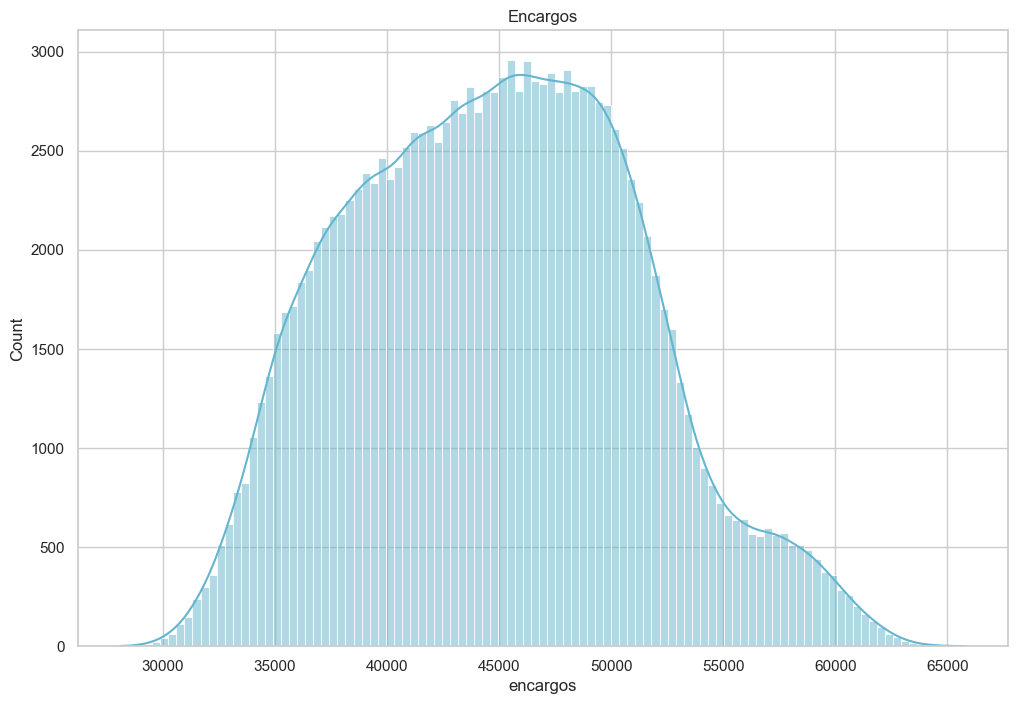

In [218]:
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(df['encargos'], kde = True, color = 'c')
plt.title('Encargos')

Text(0.5, 1.0, 'Idade')

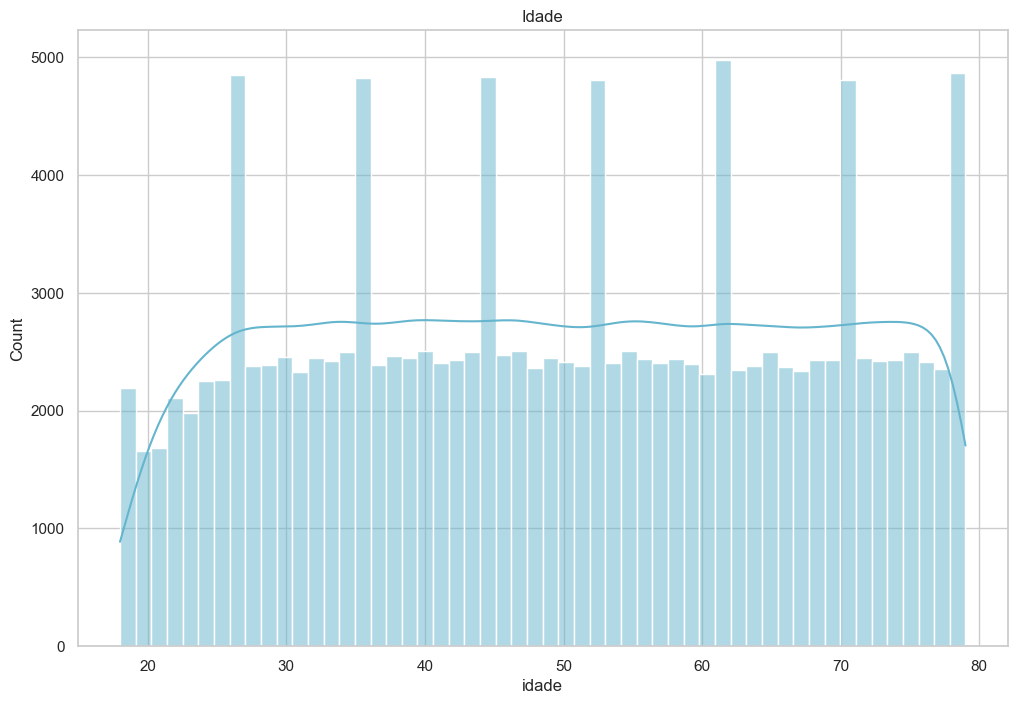

In [219]:
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(df['idade'], kde = True, color = 'c')
plt.title('Idade')

Text(0.5, 1.0, 'Filhos')

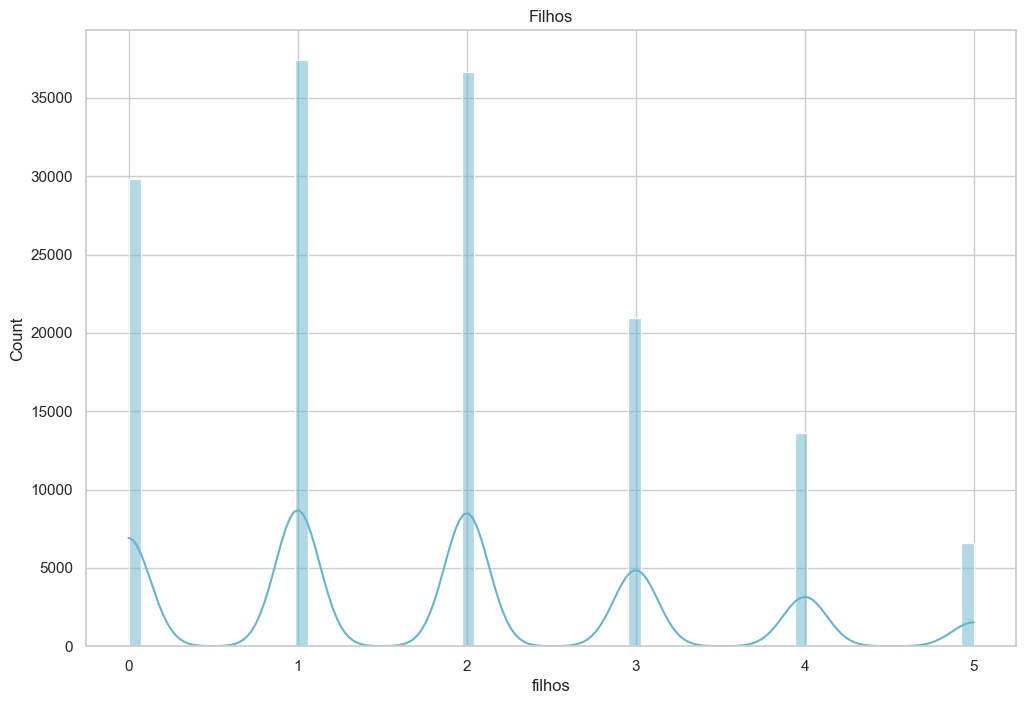

In [220]:
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(df['filhos'], kde = True, color = 'c')
plt.title('Filhos')

Text(0.5, 1.0, 'IMC')

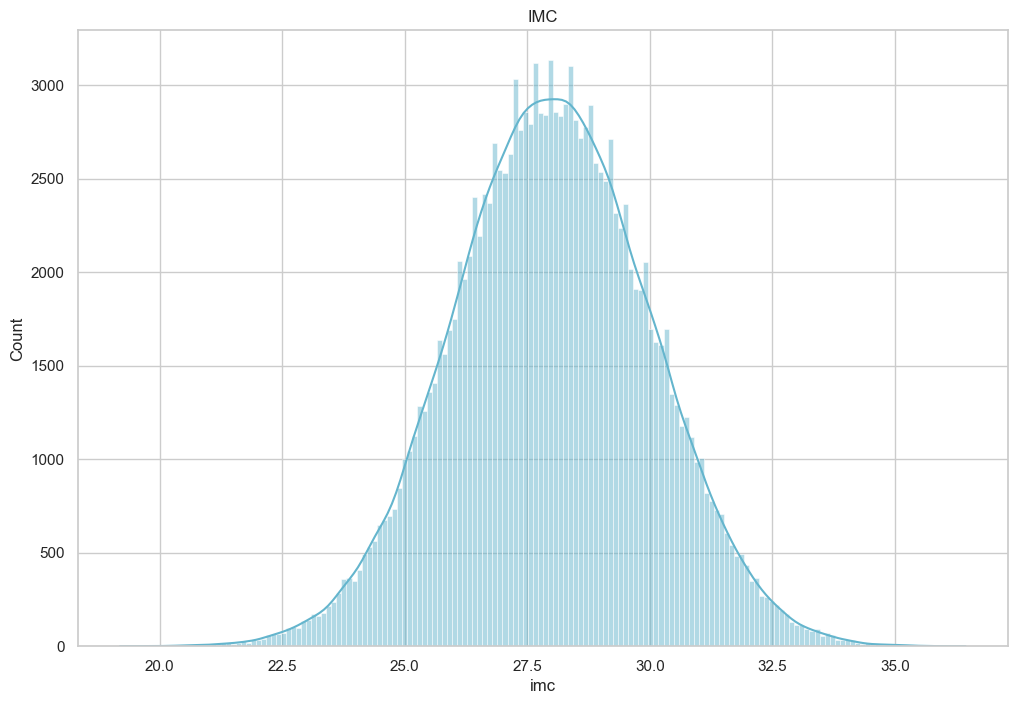

In [221]:
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(df['imc'], kde = True, color = 'c')
plt.title('IMC')

Text(0.5, 1.0, 'Fumante')

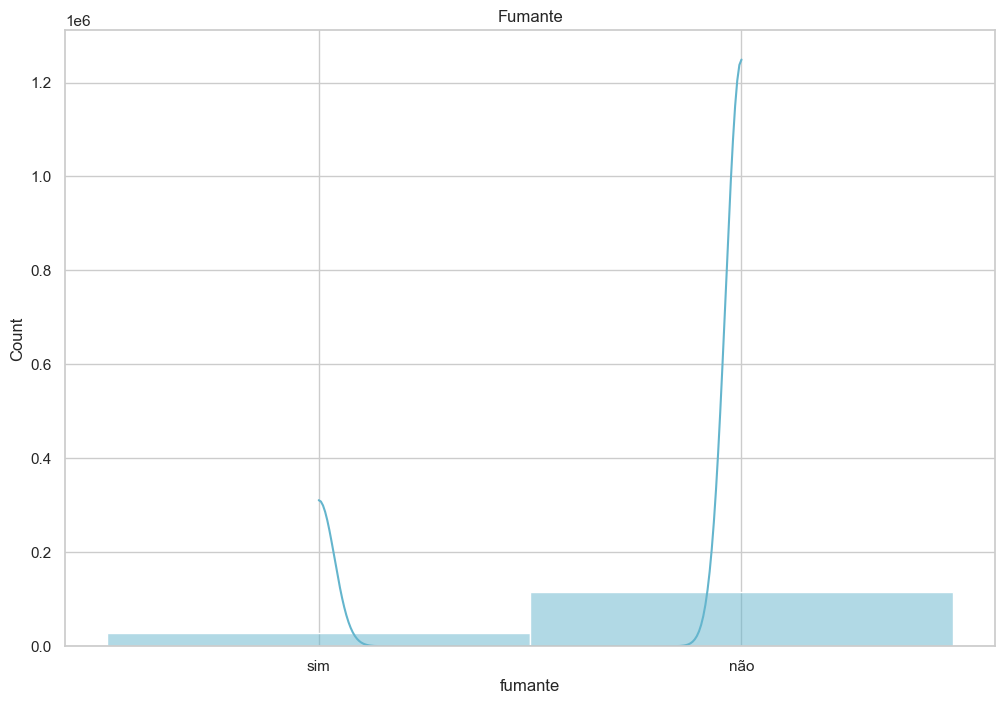

In [222]:
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(df['fumante'], kde = True, color = 'c')
plt.title('Fumante')

Text(0.5, 1.0, 'Região')

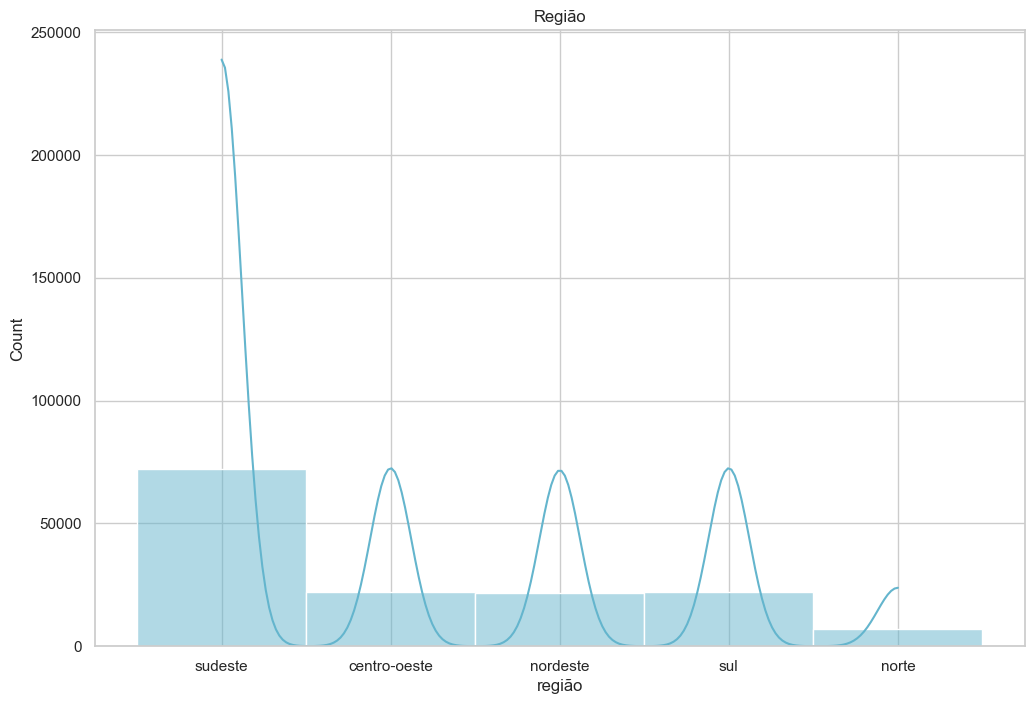

In [223]:
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(df['região'], kde = True, color = 'c')
plt.title('Região')

In [224]:
# Analisa a relação entre idade e filhos para ver se não tem nada fora do normal, como um jovem de 18 anos ter 5 filhos
df2_idade_filhos = df[['idade', 'filhos']].groupby(df.idade)
df2_idade_filhos['filhos'].describe()

,count,mean,std,min,25%,50%,75%,max
idade,,,,,,,,
18,1057.0,0.540208,0.498617,0.0,0.0,1.0,1.0,1.0
19,1133.0,0.541924,0.498459,0.0,0.0,1.0,1.0,1.0
20,1660.0,1.074096,0.811270,0.0,0.0,1.0,2.0,2.0
21,1684.0,1.067102,0.812637,0.0,0.0,1.0,2.0,2.0
22,2107.0,1.427148,1.032604,0.0,1.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...
75,2497.0,1.835002,1.399694,0.0,1.0,2.0,3.0,5.0
76,2417.0,1.882913,1.424401,0.0,1.0,2.0,3.0,5.0
77,2354.0,1.848343,1.416444,0.0,1.0,2.0,3.0,5.0


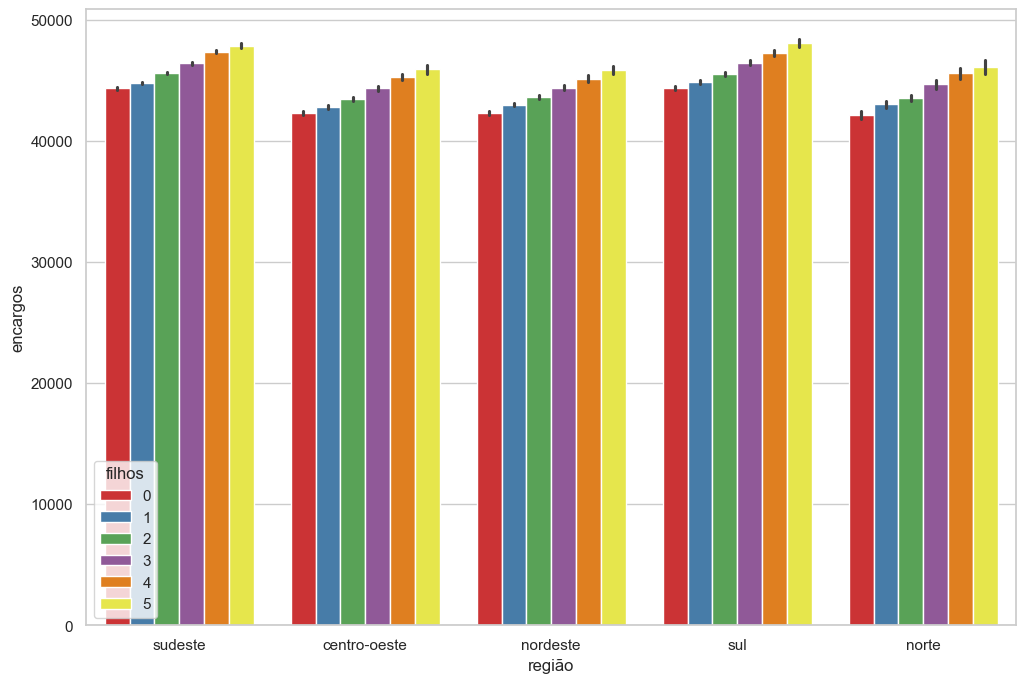

In [225]:
# Conforme a região e o número de filhos os encargos aumentam
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='região', y='encargos', hue='filhos', data=df, palette='Set1')

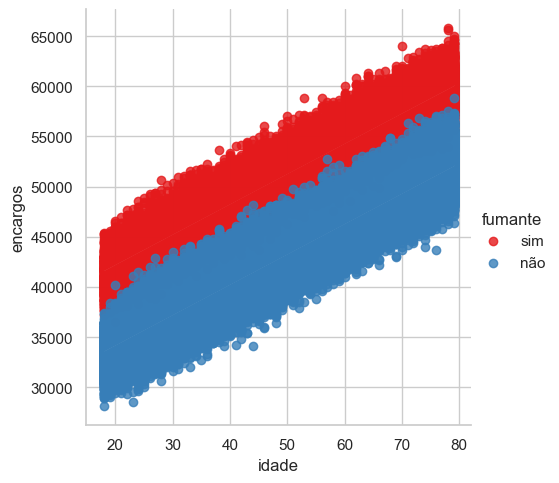

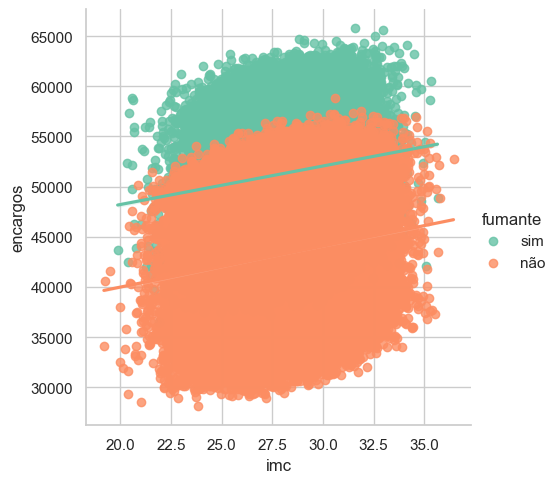

In [226]:
# Percebe que fumante, idade tem encargos maiores
ax = sns.lmplot(x = 'idade', y = 'encargos', data=df, hue='fumante', palette='Set1')
ax = sns.lmplot(x = 'imc', y = 'encargos', data=df, hue='fumante', palette='Set2')

## Antes de começar vamos realizar um pré-processamento

In [227]:
df_transformado = df.copy()

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df['gênero'].drop_duplicates())
df_transformado['gênero'] = label.transform(df['gênero'])
label.fit(df['fumante'].drop_duplicates())
df_transformado['fumante'] = label.transform(df['fumante'])
label.fit(df['região'].drop_duplicates())
df_transformado['região'] = label.transform(df['região'])

df_transformado.describe()


,idade,gênero,imc,filhos,fumante,região,encargos
count,145003.000000,145003.000000,145003.000000,145003.000000,145003.000000,145003.000000,145003.000000
mean,49.516741,0.498962,27.993941,1.798915,0.199334,2.348779,44846.967039
std,17.348343,0.500001,2.002738,1.403220,0.399501,1.317629,6394.483346
min,18.000000,0.000000,19.190000,0.000000,0.000000,0.000000,28095.350000
25%,35.000000,0.000000,26.640000,1.000000,0.000000,1.000000,39890.510000
50%,50.000000,0.000000,27.990000,2.000000,0.000000,3.000000,44846.090000
75%,65.000000,1.000000,29.340000,3.000000,0.000000,3.000000,49409.410000
max,79.000000,1.000000,36.440000,5.000000,1.000000,4.000000,65808.070000


## Vamos verficiar as correlações entre as features e o target, quanto mais quente (rosa) mais influencia

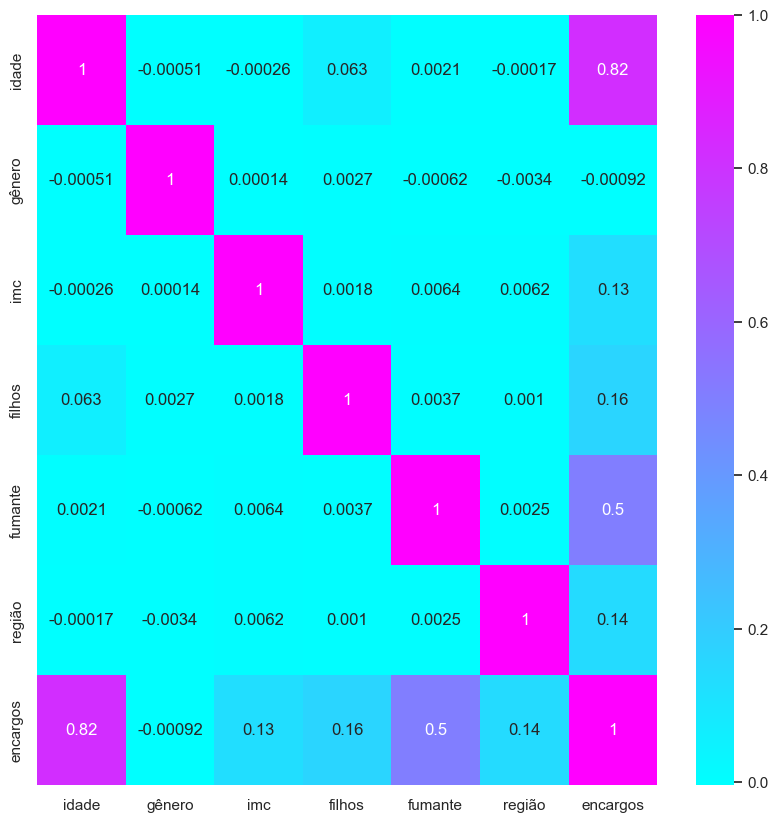

In [228]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df_transformado.corr(), annot=True, cmap='cool')

# Agora é a hora de treinar e comparar os modelos

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, BayesianRidge, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error
import numpy as np
import time

In [ ]:
# Função para calcular o MAPE (Mean Absolute Percentage Error)
def calculate_mape(labels, predictions):
    errors = np.abs(labels - predictions)
    relative_errors = errors / np.abs(labels)
    mape = np.mean(relative_errors) * 100
    return mape

# Executa os modelos logando o tempo gasto e todas as metricas para posterior comparação
def run_model(models, x_train, x_test, y_train, y_test):
    for model in models:
        tic = time.perf_counter()
        y_test_predict = model.fit(x_train, y_train).predict(x_test)
        toc = time.perf_counter()
        mape_result = calculate_mape(y_test, y_test_predict)
        mse = mean_squared_error(y_test, y_test_predict)
        rmse = root_mean_squared_error(y_test, y_test_predict)
        r2 = r2_score(y_test, y_test_predict)
        mae = mean_absolute_error(y_test, y_test_predict)
        print(f"=== {model.__class__} ====")
        print(f"MSE: {mse:.2f}")
        print(f"RMSE: {rmse:.2f}")
        print(f"MAPE: {mape_result:.2f}%")
        print(f"MAE: {mae:.2f}")
        print(f'r²: {r2:.2f}')
        print(f"Tempo gasto {toc - tic:0.4f} segundos")
        print('')
        # Conforme a região e o número de filhos os encargos aumentam
        f, ax = plt.subplots(1, 1, figsize=(12, 8))
        ax = sns.histplot(data=y_test_predict - y_test)        

## Como interpretar o MSE
* MSE inferior: indica um melhor ajuste entre o modelo e os dados
* MSE superior: indica um ajuste pior entre o modelo e os dados
* MSE de 0: indica um ajuste perfeito entre o modelo e os dados
* Links:
    - https://medium.com/@wl8380/understanding-mean-squared-error-mse-in-regression-models-9ade100c9627
    - https://encord.com/glossary/mean-square-error-mse/

## Como interpretar o MAPE
* Menos de 5%: Aceitavelmente preciso
* 10% a 25%: Precisão baixa, mas aceitável
* Maior que 25%: Precisão muito baixa
* 0%: A previsão é a mesma que a real
* Links:
    - https://medium.com/@oluwatobimesh/comparing-machine-learning-models-using-mean-absolute-error-mae-mean-absolute-percentage-error-93612c284fb8

# Métricas de regressão
* Links:
    - https://medium.com/dados-e-saude/m%C3%A9tricas-de-regress%C3%A3o-f195ed16fd8a
    - https://blog.minitab.com/pt/analise-de-regressao-como-interpretar-o-r-quadrado-e-avaliar-a-qualidade-de-ajuste

In [231]:
#Separando a base de dados e configurando os modelos
x = df_transformado.drop(['encargos'], axis = 1)
y = df_transformado['encargos']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
lasso = Lasso(alpha=0.2, 
              fit_intercept=True, 
              precompute=False,
              max_iter=1000,
              tol=0.0001, 
              warm_start=False, 
              positive=False,
              random_state=None, 
              selection='cyclic')

randomForestRegressor = RandomForestRegressor(
        n_estimators = 100,
        criterion = 'squared_error',
        random_state = 1,
        n_jobs = -1)

models = [LinearRegression(), BayesianRidge(), lasso, HuberRegressor(max_iter=200), randomForestRegressor, DecisionTreeRegressor()]

run_model(models, x_train, x_test, y_train, y_test)


=== <class 'sklearn.linear_model._base.LinearRegression'> ====
MSE: 1149139.97
RMSE: 1071.98
MAPE: 1.94%
MAE: 851.70
r²: 0.97
Tempo gasto 0.0105 segundos



C:\Users\edher\AppData\Local\Temp\ipykernel_23324\2915091721.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=y_test_predict - y_test, palette='Set1')


=== <class 'sklearn.linear_model._bayes.BayesianRidge'> ====
MSE: 1149139.99
RMSE: 1071.98
MAPE: 1.94%
MAE: 851.70
r²: 0.97
Tempo gasto 0.0244 segundos



C:\Users\edher\AppData\Local\Temp\ipykernel_23324\2915091721.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=y_test_predict - y_test, palette='Set1')


=== <class 'sklearn.linear_model._coordinate_descent.Lasso'> ====
MSE: 1149135.02
RMSE: 1071.98
MAPE: 1.94%
MAE: 851.70
r²: 0.97
Tempo gasto 0.0146 segundos



C:\Users\edher\AppData\Local\Temp\ipykernel_23324\2915091721.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=y_test_predict - y_test, palette='Set1')


In [233]:
df['encargos'].mean()

44846.967038888855

# Dado que a média dos encargos é de 44,846.97 uma margem de erro média de 851.65 não é ruim, valor este alcançado pelo modelo HuberRegressor que teve um melhor desempenho em suas métricas